In [15]:
# Prepare libs and environment setup

import warnings
import subprocess
import math

from scipy import stats
from scipy.optimize import curve_fit
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
from smithplot import SmithAxes
from IPython.display import Latex

import PrettyFigure
import PrettyTable

# ---------------------- Matplotlib config ----------------------
# Disable warnings for jupyter
warnings.filterwarnings("ignore", module="matplotlib")

# Inline plots
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

# General config
plt.rcParams['savefig.dpi'] = 75
# plt.rcParams['figure.autolayout'] = False
# plt.rcParams['figure.figsize'] = 10, 6
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['font.size'] = 16
plt.rcParams['lines.linewidth'] = 2.0
plt.rcParams['lines.markersize'] = 8
plt.rcParams['legend.fontsize'] = 14

plt.rcParams['text.usetex'] = True
plt.rcParams['text.latex.unicode'] = True
plt.rcParams['font.family'] = "STIX"
plt.rcParams['text.latex.preamble'] = "\\usepackage{subdepth}, \\usepackage{type1cm}"

sns.set(color_codes=True)

save_loc = '../documentation/report/data/images/messungen/'

In [142]:
# First measurements

df_in = pd.read_csv('../measurements/general_functionality/input_HI_0.5V.csv', header=4)
df_in['Ampl'] *= 1e3
df_in['Time'] *= 1e6

df_out = pd.read_csv('../measurements/general_functionality/output_HI_0.5V.csv', header=4)
df_out['Ampl'] *= 1e3
df_out['Time'] *= 1e6

ax = df_in.plot('Time', 'Ampl', label='$\mathrm{Input}$')
plt.plot(df_out['Time'], df_out['Ampl'], axes=ax, label='$\mathrm{Output}$')
plt.ylabel('$\mathrm{A [mV]}$')
plt.xlabel('$\mathrm{t [\mu s]}$')
plt.ylim([-100, 100])
plt.xlim([-0.2, 0.2])
plt.legend()
plt.savefig(save_loc + 'erste_messung.pdf')
plt.show()

In [17]:
# First measurements

df_in = pd.read_csv('../measurements/general_functionality/input_LO_0.5V.csv', header=4)
df_in['Ampl'] *= 1e3
df_in['Time'] *= 1e6

df_out = pd.read_csv('../measurements/general_functionality/output_LO_0.5V.csv', header=4)
df_out['Ampl'] *= 1e3
df_out['Time'] *= 1e6

ax = df_in.plot('Time', 'Ampl', label='Input')
plt.plot(df_out['Time'], df_out['Ampl'], axes=ax, label='Output')
plt.ylabel('$A [mV]$')
plt.xlabel('$t [\mu s]$')
plt.ylim([-100, 100])
plt.xlim([-0.2, 0.2])
plt.legend()
plt.show()

In [144]:
# Pseudo diffprobe

df_P = pd.read_csv('../measurements/general_functionality/diff_v1/channel1_firstdiff.csv', header=4)
df_P['Ampl'] *= 1e3
df_P['Time'] *= 1e6

df_N = pd.read_csv('../measurements/general_functionality/diff_v1/channel2_firstdiff.csv', header=4)
df_N['Ampl'] *= 1e3
df_N['Time'] *= 1e6

ax = df_P.plot('Time', 'Ampl', label='$\mathrm{P}$')
plt.plot(df_N['Time'], df_N['Ampl'], axes=ax, label='$\mathrm{N}$')
plt.ylabel('$\mathrm{A [mV]}$')
plt.xlabel('$\mathrm{t [\mu s]}$')
plt.ylim([-80, 80])
plt.xlim([-1, 1])
plt.legend()
plt.savefig(save_loc + 'zweite_messung_NP.pdf')
plt.show()

series_diff = - df_P['Ampl'] + df_N['Ampl']
series_diff *= 0.5

df_diff_osc = pd.read_csv('../measurements/general_functionality/diff_v1/function_diff_firstdiff.csv', header=4)
df_diff_osc['Ampl'] *= 1e3
df_diff_osc['Time'] *= 1e6

df_in = pd.read_csv('../measurements/general_functionality/diff_v1/input_firstdiff.csv', header=4)
df_in['Ampl'] *= 1e3
df_in['Time'] *= 1e6

plt.plot(df_diff_osc['Time'], series_diff, label='$\mathrm{Differential}$')
#plt.plot(df_diff_osc['Time'], df_diff_osc['Ampl'], label='Diff Oscilloscope')
plt.plot(df_in['Time'], df_in['Ampl'], label='$\mathrm{Input}$')
plt.ylabel('$\mathrm{A [mV]}$')
plt.xlabel('$\mathrm{t [\mu s]}$')
plt.ylim([-80, 80])
plt.xlim([-1, 1])
plt.legend()
plt.savefig(save_loc + 'zweite_messung_INOUT.pdf')
plt.show()

In [19]:
# First calcs wheter the expected gain is reached or not with the AD8331

R1 = 237
R2 = 28
R3 = 250
RL = 50
RS = 250
omega = 1e6 * 2 * math.pi
Z = 25

C = abs(1 / (Z * 1j * omega))
print(C)

R1 = 1 / 2 * (RS + math.sqrt(RS * (RS - 2 * RL)))
print('R1:', R1, '=>', math.ceil(R1))

R2 = RL * R1 / (R1 - RL)
print('R2:', R2, '=>', math.ceil(R2))

R2pRL = (R2 * RL) / (R2 + RL)
a = R2pRL / (R1 + R2pRL)
print('alpha:', a)

a = RL / (RS + math.sqrt(RS*(RS-2*RL)))
print('alpha:', a)

da = (RS - RL) / (-2 * RS * math.sqrt(RS*(RS-2*RL)))
print('deltaalpha:', da)

rms_in = 1.2e-3
rms_out = 750e-6
V_Gain = 0.3

A = 20 * math.log10(rms_out / rms_in / a * 2)
print('A:', A, 'VdB')
A_should = 50 * V_Gain - 6.5
print('A should be:', A_should, 'dB')

V_Gain = 0.28

Gain_dB = -16 #dB
Gain_should = 50 * V_Gain - 6.5
a_Gain = 20 * math.log10(1 / a)
a_Diff = 20 * math.log10(2)
Gain_missing = Gain_should - (Gain_dB + a_Gain + a_Diff)
print('Missing Gain:', Gain_missing, 'dB')

6.366197723675814e-09
R1: 221.82458365518542 => 222
R2: 64.54972243679028 => 65
alpha: 0.11270166537925831
alpha: 0.11270166537925831
deltaalpha: -0.0020655911179772893
A: 20.89959358792075 VdB
A should be: 8.5 dB
Missing Gain: -1.481993241039243 dB


In [21]:
# Expected and reached gain compared in calcs

rms_in = 1.2e-3
rms_out = 1.3e-3
V_Gain = 0.28

print('a is:', a)

print('')
print('V_Gain is: ', V_Gain)
A = 20 * math.log10(rms_out / rms_in / a)
print('A:', A, 'VdB')
A_should = 50 * V_Gain + 5.5
print('A should be:', A_should, 'dB')

######################

rms_in = 1.2e-3
rms_out = 4.05e-3
V_Gain = 0.5

print('')
print('V_Gain is: ', V_Gain)
A = 20 * math.log10(rms_out / rms_in / a)
print('A:', A, 'VdB')
A_should = 50 * V_Gain + 5.5
print('A should be:', A_should, 'dB')

######################

rms_in = 1.2e-3
rms_out = 21.4e-3
V_Gain = 0.8

print('')
print('V_Gain is: ', V_Gain)
A = 20 * math.log10(rms_out / rms_in / a)
print('A:', A, 'VdB')
A_should = 50 * V_Gain + 5.5
print('A should be:', A_should, 'dB')

######################

rms_in = 1.173e-3
rms_out = 1.307e-3
V_Gain = 0.27

print('')
print('V_Gain is: ', V_Gain)
A = 20 * math.log10(rms_out / rms_in / a)
print('A:', A, 'VdB')
A_should = 50 * V_Gain + 5.5
print('A should be:', A_should, 'dB')

a is: 0.11270166537925831

V_Gain is:  0.28
A: 19.65663545294386 VdB
A should be: 19.5 dB

V_Gain is:  0.5
A: 29.526868871100493 VdB
A should be: 30.5 dB

V_Gain is:  0.8
A: 43.98604387379094 VdB
A should be: 45.5 dB

V_Gain is:  0.27
A: 19.90094483705992 VdB
A should be: 19.0 dB


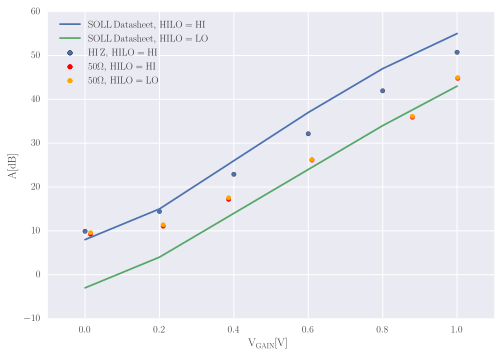

In [152]:
# Measurements of the broken AFE which did not variate gain anymore ...

rms_in = [1.29e-3] * 6
rms_out = np.array([0.455e-3, 0.765e-3, 2.03e-3, 5.88e-3, 18.18e-3, 50e-3])
V_Gain = [0.00, 0.2, 0.4, 0.6, 0.8, 1]
A = 20 * np.log10(rms_out / rms_in / a)
plt.scatter(V_Gain, A, label='$\mathrm{HI\,Z,\,HILO=HI}$')

rms_in = [1.29e-3] * 6
rms_out = np.array([0.420e-3, 0.520e-3, 1.048e-3, 2.95e-3, 9.08e-3, 25.2e-3])
V_Gain = [0.0148, 0.21, 0.386, 0.61, 0.88, 1.002]
A = 20 * np.log10(rms_out / rms_in / a)
plt.scatter(V_Gain, A, label='$\mathrm{50\Omega,\,HILO=HI}$', color='red')
A += np.random.rand(len(A)) * 0.5
plt.scatter(V_Gain, A, label='$\mathrm{50\Omega,\,HILO=LO}$', color='orange')

V_Gain = [0, 0.2, 0.4, 0.6, 0.8, 1]
A = [8, 15, 26, 37, 47, 55]
plt.plot(V_Gain, A, label='$\mathrm{SOLL\,Datasheet,\,HILO=HI}$')

V_Gain = [0, 0.2, 0.4, 0.6, 0.8, 1]
A = [-3, 4, 14, 24, 34, 43]
plt.plot(V_Gain, A, label='$\mathrm{SOLL\,Datasheet,\,HILO=LO}$')

plt.xlim([-0.1, 1.1])
plt.xlabel('$\mathrm{V_{GAIN} [V]}$')
plt.ylabel('$\mathrm{A [dB]}$')
plt.legend(bbox_to_anchor=(0.4, 1))
plt.savefig(save_loc + 'kaputtes_AFE.pdf')
plt.show()

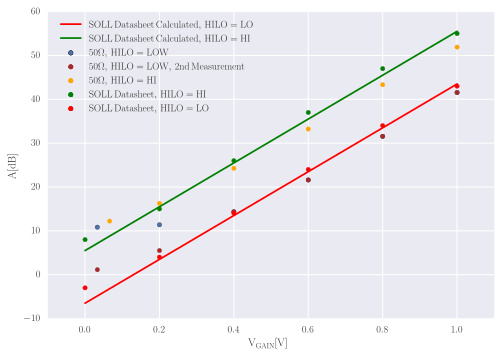

In [149]:
# Verifying measurements with the AD8331 that was functioning properly

Z0 = 50
ZL = 60
comp_input_Z = 20*math.log10(1-((ZL-Z0)/(ZL+Z0)))

rms_in = [1.29e-3] * 6
rms_out = np.array([0.230e-3, 0.245e-3, 0.345e-3, 0.795e-3, 2.5e-3, 7.9e-3])
V_Gain = [0.033, 0.2, 0.4, 0.6, 0.8, 1]
A = 20 * np.log10(rms_out / rms_in / a * 2) - comp_input_Z
plt.scatter(V_Gain, A, label='$\mathrm{50\Omega,\,HILO=LOW}$')

rms_in = [4.45e-3, 4.455e-3] + [1.29e-3] * 4
rms_out = np.array([0.260e-3, 0.43e-3, 0.345e-3, 0.795e-3, 2.5e-3, 7.9e-3])
V_Gain = [0.033, 0.2, 0.4, 0.6, 0.8, 1]
A = 20 * np.log10(rms_out / rms_in / a * 2) - comp_input_Z
plt.scatter(V_Gain, A, label='$\mathrm{50\Omega,\,HILO=LOW,\,2nd\,Measurement}$', color='brown')

rms_in = [1.29e-3] * 6
rms_out = np.array([0.27e-3, 0.430e-3, 1.08e-3, 3.03e-3, 9.7e-3, 26.0e-3])
V_Gain = [0.066, 0.2, 0.4, 0.6, 0.8, 1]
A = 20 * np.log10(rms_out / rms_in / a * 2) - comp_input_Z
plt.scatter(V_Gain, A, label='$\mathrm{50\Omega,\,HILO=HI}$', color='orange')

# rms_in = [1.29e-3] * 6
# rms_out = np.array([0.420e-3, 0.520e-3, 1.048e-3, 2.95e-3, 9.08e-3, 25.2e-3])
# V_Gain = [0.0148, 0.21, 0.386, 0.61, 0.88, 1.002]
# A = 20 * np.log10(rms_out / rms_in / a)
# plt.plot(V_Gain, A, label='50$\\Omega$, HILO=HI')

V_Gain = np.array([0, 0.2, 0.4, 0.6, 0.8, 1])
A_should = 50 * V_Gain - 6.5
plt.plot(V_Gain, A_should, label='$\mathrm{SOLL\,Datasheet\,Calculated,\,HILO=LO}$', color='red')

V_Gain = np.array([0, 0.2, 0.4, 0.6, 0.8, 1])
A_should = 50 * V_Gain + 5.5
plt.plot(V_Gain, A_should, label='$\mathrm{SOLL\,Datasheet\,Calculated,\,HILO=HI}$', color='green')

V_Gain = [0, 0.2, 0.4, 0.6, 0.8, 1]
A = [8, 15, 26, 37, 47, 55]
plt.scatter(V_Gain, A, label='$\mathrm{SOLL\,Datasheet,\,HILO=HI}$', color='green')

V_Gain = [0, 0.2, 0.4, 0.6, 0.8, 1]
A = [-3, 4, 14, 24, 34, 43]
plt.scatter(V_Gain, A, label='$\mathrm{SOLL\,Datasheet,\,HILO=LO}$', color='red')

plt.xlim([-0.1, 1.1])
plt.xlabel('$\mathrm{V_{GAIN} [V]}$')
plt.ylabel('$\mathrm{A [dB]}$')
plt.legend(bbox_to_anchor=(0.52, 0.9),
           bbox_transform=plt.gcf().transFigure)
plt.savefig(save_loc + 'ganzes_AFE.pdf')
plt.show()

In [25]:
# Additional verifying measurmenets für AD8331 to work properly

Z0 = 50
ZL = 45
comp_input_Z = 20*math.log10(1-((ZL-Z0)/(ZL+Z0)))
#print(comp_input_Z)

V_Gain = np.array([0, 0.2, 0.4, 0.6, 0.8, 1])
A_should = 50 * V_Gain - 6.5
plt.plot(V_Gain, A_should, label='SOLL Datasheet Calculated, HILO=LO', color='red')

V_Gain = [0, 0.2, 0.4, 0.6, 0.8, 1]
A = [-3, 4, 14, 24, 34, 43]
plt.scatter(V_Gain, A, label='SOLL Datasheet, HILO=LO', color='red')

V_Gain = [0.04, 0.21, 0.44, 0.6, 0.8, 1]
A = np.array([-28.93, -21.3, -10, -1.75, 7.8, 17.9]) + 20 * np.log10(1 / a * 2)
plt.scatter(V_Gain, A, label='VNA, HILO=LO', color='purple')

plt.legend(bbox_to_anchor=(0.1, 0.9),
           bbox_transform=plt.gcf().transFigure)
plt.show()

In [26]:
# Automated Transmission Measurement -30dBm 200P 70kHz steps

R1 = 237
R2 = 28
R3 = 250
RL = 50
RS = 250

R1 = 1 / 2 * (RS + math.sqrt(RS * (RS - 2 * RL)))
print('R1:', R1, '=>', math.ceil(R1))

R2 = RL * R1 / (R1 - RL)
print('R2:', R2, '=>', math.ceil(R2))

R2pRL = (R2 * RL) / (R2 + RL)
a = R2pRL / (R1 + R2pRL)
print('alpha:', a)

f, axarr = plt.subplots(10, sharex=True)
f.set_size_inches(15, 40)
n = 0
print('=' * 10)
colors = cm.rainbow(np.linspace(0, 1, 10))
for i in range(4, 101):
    i /= 100
    A_should = 50 * i - 6.5
    subprocess.call(['sed', '-i.bak', 's/+-/-/g', '../measurements/vga_2016-12-16_30dBm/reading_transmission_{:.2f}.csv'.format(i)])
    data = np.loadtxt('../measurements/vga_2016-12-16_30dBm/reading_transmission_{:.2f}.csv'.format(i), dtype=np.complex, delimiter=',')
    #A = 20 * np.log10(rms_out / rms_in / a)
    axarr[n // 10].scatter(np.linspace(3e5, 5e7, len(data)), list(map(lambda x: 20 * np.log10(np.abs(x / a * 2)), data)), color=colors[n % 10], label='')
    axarr[n // 10].axhline(A_should)
    n += 1
    if i * 100 % 10 == 0:
        print('=', end='')
print('\nDone.')

#plt.legend()
f.show()
f.savefig(save_loc + 'vga_2016-12-16_30dBm_transmission.pdf')
f.savefig('vga_2016-12-16_30dBm_transmission.svg')
f.savefig('vga_2016-12-16_30dBm_transmission.png', dpi=200)

R1: 221.82458365518542 => 222
R2: 64.54972243679028 => 65
alpha: 0.11270166537925831
Done.


In [ ]:
# Min Transmission Measurement -30dB 200P  70kHz steps
import scipy as sp

print('=' * 10)
colors = cm.rainbow(np.linspace(0, 1, 10))
means = []
should = []
x = []
f, axarr = plt.subplots(2, sharex=True)
f.set_size_inches(13, 5)
axarr[0].set_xlim((0, 1.04))
for i in range(4, 101):
    i /= 100
    x.append(i)
    should.append(50 * i - 6.5)
    subprocess.call(['sed', '-i.bak', 's/+-/-/g', '../measurements/vga_2016-12-16_30dBm/reading_transmission_{:.2f}.csv'.format(i)])
    data = np.loadtxt('../measurements/vga_2016-12-16_30dBm/reading_transmission_{:.2f}.csv'.format(i), dtype=np.complex, delimiter=',')
    data = list(map(lambda x: 20 * np.log10(np.abs(x / a * 2)), data))
    means.append(np.mean(data))
    if i * 100 % 10 == 0:
        print('=', end='')
print('\nDone.')
axarr[0].scatter(x, means, color=colors[n % 10])
axarr[0].plot(x, should, color=colors[n % 10 + 1])

diff = np.subtract(means, should)
# axarr[1].bar(x, means, 0.008, color=colors[n % 10])
axarr[1].bar(x, -diff, 0.008, color=list(map(lambda x: 'red' if np.sign(x) == -1 else 'green', diff)))

#plt.legend()
f.show()
f.savefig(save_loc + 'vga_2016-12-16_30dBm_transmission2.pdf')
f.savefig('vga_2016-12-16_30dBm_transmission2.svg')
f.savefig('vga_2016-12-16_30dBm_transmission2.png', dpi=200)

Done.


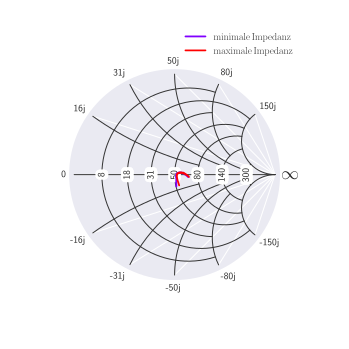

In [137]:
# Input Impedance AD8331 Measurement 200P  70kHz steps

print('=' * 10)
Z0 = 50
colors = cm.rainbow(np.linspace(0, 1, 10))
impedance = []
x = []
std = []
mi = [1e9 for x in range(201)]
ma = [0 for x in range(201)]

kw = {
    'projection': 'smith',
    'grid_major_enable': True,
    'grid_minor_enable': False,
    'axes_normalize': False,
    'axes_impedance': 50,
    'axes_radius': 0.3
}
f, ax = plt.subplots(1, subplot_kw=kw)
f.set_size_inches(6, 6)
for i in range(4, 101):
    i /= 100
    x.append(i)
    subprocess.call(['sed', '-i.bak', 's/+-/-/g', '../measurements/vga_2016-12-16_30dBm/reading_reflection_{:.2f}.csv'.format(i)])
    data = np.loadtxt('../measurements/vga_2016-12-16_30dBm/reading_reflection_{:.2f}.csv'.format(i), dtype=np.complex, delimiter=',')
    S11 = data
    ZL =  (S11 * Z0 + Z0) / (1 - S11)
    mi = np.fmin(mi, ZL)
    ma = np.fmax(ma, ZL)
    impedance.append(np.mean(ZL))
    if i * 100 % 10 == 0:
        print('=', end='')
        
ax.plot(mi, datatype=SmithAxes.Z_PARAMETER, color=colors[0], label='$\mathrm{minimale\,Impedanz}$', marker=None)
ax.plot(ma, datatype=SmithAxes.Z_PARAMETER, color=colors[9], label='$\mathrm{maximale\,Impedanz}$', marker=None)
print('\nDone.')

ax.legend(bbox_to_anchor=(0.9, 0.95))
f.show()
f.savefig(save_loc + 'input_Z_A8331.pdf')
f.savefig('input_Z_A8331.svg')
f.savefig('input_Z_A8331.png', dpi=200)

In [27]:
# Calculate dBm needed from the VNA to measure the entire range

import math

A_min = 19 + 21 + 3.5 - 48
A_max = 19 + 21 + 3.5

dBm_in = -30
V_out_max = math.sqrt(10**((dBm_in + A_max) / 10) * 1e-3 * 50)
print('V_out_max:', V_out_max)
V_out_min = math.sqrt(10**((dBm_in + A_min) / 10) * 1e-3 * 50)
print('V_out_min:', V_out_min)

A_min = 28.5 + 19 + 21 + 3.5 - 48
A_max = 28.5 + 19 + 21 + 3.5

dBm_in = -55
V_out_max = math.sqrt(10**((dBm_in + A_max) / 10) * 1e-3 * 50)
print('V_out_max:', V_out_max)
V_out_min = math.sqrt(10**((dBm_in + A_min) / 10) * 1e-3 * 50)
print('V_out_min:', V_out_min)

V_out_max: 1.0579983786774771
V_out_min: 0.004211967409854778
V_out_max: 1.5830148982673415
V_out_min: 0.0063020958209324355


In [ ]:
# VGA + LNA Transmission Measurement -40dBm 200P 70kHz steps

R1 = 237
R2 = 28
R3 = 250
RL = 50
RS = 250

R1 = 1 / 2 * (RS + math.sqrt(RS * (RS - 2 * RL)))
print('R1:', R1, '=>', math.ceil(R1))

R2 = RL * R1 / (R1 - RL)
print('R2:', R2, '=>', math.ceil(R2))

R2pRL = (R2 * RL) / (R2 + RL)
a = R2pRL / (R1 + R2pRL)
print('alpha:', a)

f, axarr = plt.subplots(10, sharex=True)
f.set_size_inches(15, 40)
n = 0
print('=' * 10)
colors = cm.rainbow(np.linspace(0, 1, 10))
for i in range(4, 101):
    i /= 100
    A_should = 50 * i - 6.5 + 28.5
    subprocess.call(['sed', '-i.bak', 's/+-/-/g', '../measurements/vga_lna_2016-12-19_40dBm/reading_transmission_{:.2f}.csv'.format(i)])
    data = np.loadtxt('../measurements/vga_lna_2016-12-19_40dBm/reading_transmission_{:.2f}.csv'.format(i), dtype=np.complex, delimiter=',')
    #A = 20 * np.log10(rms_out / rms_in / a)
    axarr[n // 10].scatter(np.linspace(3e5, 5e7, len(data)), list(map(lambda x: 20 * np.log10(np.abs(x / a * 2)), data)), color=colors[n % 10], label='')
    axarr[n // 10].axhline(A_should)
    n += 1
    if i * 100 % 10 == 0:
        print('=', end='')
print('\nDone.')

#plt.legend()
f.show()
f.savefig('vga_2016-12-16_40dBm_LNA_transmission.svg')
f.savefig('vga_2016-12-16_40dBm_LNA_transmission.png', dpi=200)

In [ ]:
# VGA + LNA Transmission Measurement -50dBm 200P 70kHz steps

R1 = 237
R2 = 28
R3 = 250
RL = 50
RS = 250

R1 = 1 / 2 * (RS + math.sqrt(RS * (RS - 2 * RL)))
print('R1:', R1, '=>', math.ceil(R1))

R2 = RL * R1 / (R1 - RL)
print('R2:', R2, '=>', math.ceil(R2))

R2pRL = (R2 * RL) / (R2 + RL)
a = R2pRL / (R1 + R2pRL)
print('alpha:', a)

f, axarr = plt.subplots(10, sharex=True)
f.set_size_inches(15, 40)
n = 0
print('=' * 10)
colors = cm.rainbow(np.linspace(0, 1, 10))
for i in range(4, 101):
    i /= 100
    A_should = 50 * i - 6.5 + 28.5
    subprocess.call(['sed', '-i.bak', 's/+-/-/g', '../measurements/vga_lna_2016-12-19_50dBm/reading_transmission_{:.2f}.csv'.format(i)])
    data = np.loadtxt('../measurements/vga_lna_2016-12-19_50dBm/reading_transmission_{:.2f}.csv'.format(i), dtype=np.complex, delimiter=',')
    #A = 20 * np.log10(rms_out / rms_in / a)
    axarr[n // 10].scatter(np.linspace(3e5, 5e7, len(data)), list(map(lambda x: 20 * np.log10(np.abs(x / a * 2)), data)), color=colors[n % 10], label='')
    axarr[n // 10].axhline(A_should)
    n += 1
    if i * 100 % 10 == 0:
        print('=', end='')
print('\nDone.')

#plt.legend()
f.show()
f.savefig('vga_2016-12-16_50dBm_LNA_transmission.svg')
f.savefig('vga_2016-12-16_50dBm_LNA_transmission.png', dpi=200)

Done.


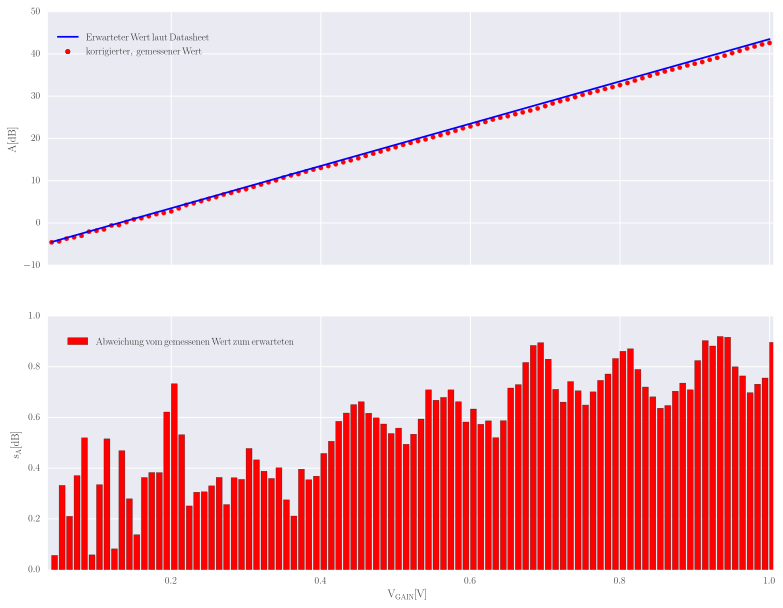

In [159]:
# Min Transmission Measurement -50dB 200P 70kHz steps
import scipy as sp

print('=' * 10)
colors = cm.rainbow(np.linspace(0, 1, 10))
means = []
should = []
x = []
f, axarr = plt.subplots(2, sharex=True)
f.set_size_inches(13, 10)
axarr[0].set_xlim((0, 1.04))
for i in range(4, 101):
    i /= 100
    x.append(i)
    should.append(50 * i - 6.5)
    subprocess.call(['sed', '-i.bak', 's/+-/-/g', '../measurements/vga_2016-12-22_30dBm/reading_transmission_{:.2f}.csv'.format(i)])
    data = np.loadtxt('../measurements/vga_2016-12-22_30dBm/reading_transmission_{:.2f}.csv'.format(i), dtype=np.complex, delimiter=',')
    data = list(map(lambda x: 20 * np.log10(np.abs(x / a * 2)), data))
    means.append(np.mean(data))
    if i * 100 % 10 == 0:
        print('=', end='')
print('\nDone.')
axarr[0].scatter(x, means, color='red', label='$\mathrm{korrigierter,\,gemessener\,Wert}$')
axarr[0].plot(x, should, color='blue', label='$\mathrm{Erwarteter\,Wert\,laut\,Datasheet}$')

diff = np.subtract(means, should)
#axarr[1].bar(x, means, 0.008, color=colors[n % 10])
axarr[1].bar(x, -diff, 0.008, color='red', label='$\mathrm{Abweichung\,vom\,gemessenen\,Wert\,zum\,erwarteten}$')
diff_ad8331 = diff

axarr[0].set_ylabel('$\mathrm{A [dB]}$')
axarr[1].set_ylabel('$\mathrm{s_A [dB]}$')
axarr[1].set_xlabel('$\mathrm{V_{GAIN} [V]}$')
axarr[1].set_xlim([0.035, 1.005])
axarr[0].legend(bbox_to_anchor=(0.25, 0.95))
axarr[1].legend(bbox_to_anchor=(0.375, 0.95))
f.show()
f.savefig(save_loc + 'vga_2016-12-22_30dBm_transmission2.pdf')
f.savefig('vga_2016-12-22_30dBm_transmission2.svg')
f.savefig('vga_2016-12-22_30dBm_transmission2.png', dpi=200)

In [6]:
# LNA Transmission Measurement -50dB 200P 70kHz steps (was weird, discard)
import scipy as sp

print('=' * 10)
colors = cm.rainbow(np.linspace(0, 1, 10))
means = []
should = []
x = []
f, axarr = plt.subplots(2, sharex=True)
f.set_size_inches(13, 13)
axarr[0].set_xlim((0, 1.04))
for i in range(4, 101):
    i /= 100
    x.append(i)
    should.append(50 * i - 6.5 + 28.5)
    subprocess.call(['sed', '-i.bak', 's/+-/-/g', '../measurements/vga_lna_2016-12-22_50dBm/reading_transmission_{:.2f}.csv'.format(i)])
    data = np.loadtxt('../measurements/vga_lna_2016-12-22_50dBm/reading_transmission_{:.2f}.csv'.format(i), dtype=np.complex, delimiter=',')
    data = list(map(lambda x: 20 * np.log10(np.abs(x / a * 2)), data))
    means.append(np.mean(data))
    if i * 100 % 10 == 0:
        print('=', end='')
print('\nDone.')
axarr[0].scatter(x, means, color=colors[n % 10])
axarr[0].plot(x, should, color=colors[n % 10])

diff = np.subtract(means, should)
diff_ad8331 = diff
axarr[1].bar(x, means, 0.008, color=colors[n % 10])
axarr[1].bar(x, diff, 0.008, color=list(map(lambda x: 'red' if np.sign(x) == -1 else 'green', diff)))

#plt.legend()
f.show()
f.savefig('vga_2016-12-22_50dBm_LNA_transmission2.svg')
f.savefig('vga_2016-12-22_50dBm_LNA_transmission2.png', dpi=200)

Done.


R1: 221.82458365518542 => 222
R2: 64.54972243679028 => 65
alpha: 0.11270166537925831
Done.


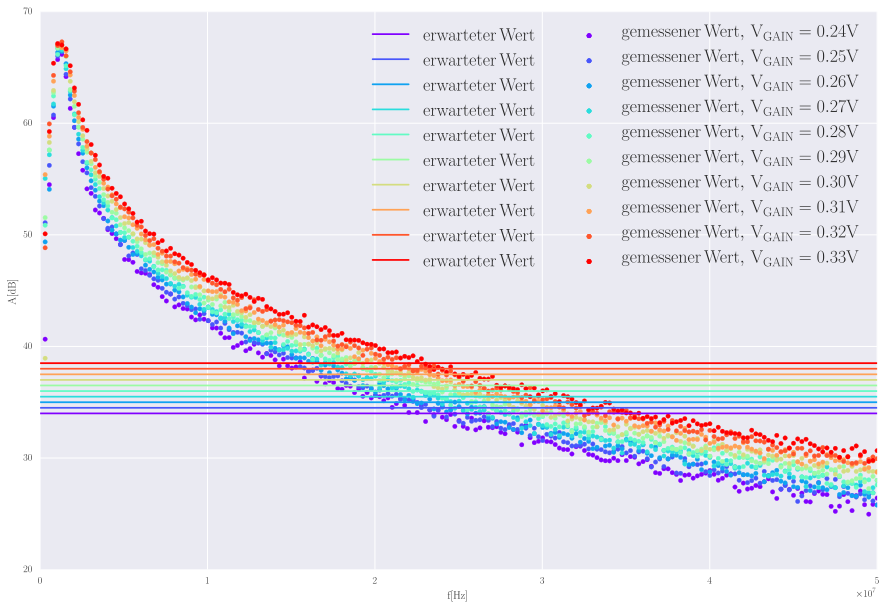

In [158]:
# VGA + LNA Transmission Measurement -50dBm -20dBm 200P OK 70kHz steps. clips up top, wrongly terminated with 0 Ohm

R1 = 237
R2 = 28
R3 = 250
RL = 50
RS = 250

R1 = 1 / 2 * (RS + math.sqrt(RS * (RS - 2 * RL)))
print('R1:', R1, '=>', math.ceil(R1))

R2 = RL * R1 / (R1 - RL)
print('R2:', R2, '=>', math.ceil(R2))

R2pRL = (R2 * RL) / (R2 + RL)
a = R2pRL / (R1 + R2pRL)
print('alpha:', a)

f, axarr = plt.subplots(10, sharex=True)
f.set_size_inches(15, 40)
n = 0
print('=' * 10)
colors = cm.rainbow(np.linspace(0, 1, 10))
for i in range(4, 101):
    i /= 100
    A_should = 50 * i - 6.5 + 28.5
    subprocess.call(['sed', '-i.bak', 's/+-/-/g', '../measurements/vga_lna_2016-12-22_50dBm_20dB_ok/reading_transmission_{:.2f}.csv'.format(i)])
    data = np.loadtxt('../measurements/vga_lna_2016-12-22_50dBm_20dB_ok/reading_transmission_{:.2f}.csv'.format(i), dtype=np.complex, delimiter=',')
    #A = 20 * np.log10(rms_out / rms_in / a)
    axarr[n // 10].scatter(np.linspace(3e5, 5e7, len(data)), list(map(lambda x: 20 * np.log10(np.abs(x / a * 2)), data)), color=colors[n % 10], label='')
    axarr[n // 10].axhline(A_should)
    n += 1
    if i * 100 % 10 == 0:
        print('=', end='')
print('\nDone.')
plt.close(f)

plt.figure(figsize=(15, 10))
n = 0
for i in range(24, 34):
    i /= 100
    A_should = 50 * i - 6.5 + 28.5
    subprocess.call(['sed', '-i.bak', 's/+-/-/g', '../measurements/vga_lna_2016-12-22_50dBm_20dB_ok/reading_transmission_{:.2f}.csv'.format(i)])
    data = np.loadtxt('../measurements/vga_lna_2016-12-22_50dBm_20dB_ok/reading_transmission_{:.2f}.csv'.format(i), dtype=np.complex, delimiter=',')
    #A = 20 * np.log10(rms_out / rms_in / a)
    plt.scatter(np.linspace(3e5, 5e7, len(data)), list(map(lambda x: 20 * np.log10(np.abs(x / a * 2)), data)), color=colors[n % 10], label='$\mathrm{{gemessener\,Wert,\,V_{{GAIN}}={:.2f}V}}$'.format(i))
    plt.axhline(A_should, color=colors[n % 10], label='$\mathrm{erwarteter\,Wert}$')
    n+=1
plt.xlim([0, 50e6])
plt.xlabel('$\mathrm{f [Hz]}$')
plt.ylabel('$\mathrm{A [dB]}$')
plt.legend(ncol=2, bbox_to_anchor=(1, 1), prop={'size': 18})
plt.savefig(save_loc + 'vga_lna_2016-12-22_50dBm_20dB_transmission3.pdf')
plt.show()

# plt.legend()
# f.show()
# f.savefig('vga_2016-12-22_50dBm_LNA_20dB_3_transmission.svg')
# f.savefig('vga_2016-12-22_50dBm_LNA_20dB_3_transmission.png', dpi=200)

Done.

Done.


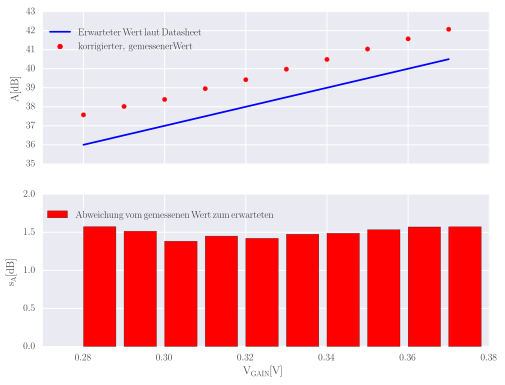

In [130]:
# VGA + LNA Transmission Measurment -50dB -20dB 200P OK 70kHz steps, clips up top, wrongly terminated with 0 Ohm
import scipy as sp

print('=' * 10)
colors = cm.rainbow(np.linspace(0, 1, 10))
means = []
should = []
x = []
f, axarr = plt.subplots(2, sharex=True)
f.set_size_inches(13, 13)
axarr[0].set_xlim((0, 1.04))
for i in range(4, 101):
    i /= 100
    x.append(i)
    should.append(50 * i - 6.5 + 28.5)
    subprocess.call(['sed', '-i.bak', 's/+-/-/g', '../measurements/vga_lna_2016-12-22_50dBm_20dB_ok/reading_transmission_{:.2f}.csv'.format(i)])
    data = np.loadtxt('../measurements/vga_lna_2016-12-22_50dBm_20dB_ok/reading_transmission_{:.2f}.csv'.format(i), dtype=np.complex, delimiter=',')
    data = list(map(lambda x: 20 * np.log10(np.abs(x / a * 2)), data))
    means.append(np.mean(data))
    if i * 100 % 10 == 0:
        print('=', end='')
print('\nDone.')
axarr[0].scatter(x, means, color=colors[n % 10])
axarr[0].plot(x, should, color=colors[n % 10])

diff = np.subtract(means, should)
axarr[1].bar(x, means, 0.008, color=colors[n % 10])
axarr[1].bar(x, diff, 0.008, color=list(map(lambda x: 'red' if np.sign(x) == -1 else 'green', diff)))

plt.close(f)
#plt.legend()
# f.show()
# f.savefig('vga_2016-12-22_50dBm_LNA_transmission2.svg')
# f.savefig('vga_2016-12-22_50dBm_LNA_transmission2.png', dpi=200)

# Singled out measurements

f, axarr = plt.subplots(2, sharex=True)
f.set_size_inches(8, 6)
axarr[0].set_xlim((0.27, 0.38))
print('\nDone.')

axarr[0].scatter(x[24:34], means[24:34], color='red', label='$\mathrm{korrigierter,\,gemessener\,Wert}$')
axarr[0].plot(x[24:34], should[24:34], color='blue', label='$\mathrm{Erwarteter\,Wert\,laut\,Datasheet}$')

#axarr[1].bar(x[24:34], means[24:34], 0.008, color=colors[n % 10])
axarr[1].bar(x[24:34], diff[24:34], 0.008, color='red', label='$\mathrm{Abweichung\,vom\,gemessenen\,Wert\,zum\,erwarteten}$')

axarr[1].set_ylim((0, 2))

axarr[0].set_ylabel('$\mathrm{A [dB]}$')
axarr[1].set_ylabel('$\mathrm{s_A [dB]}$')
axarr[1].set_xlabel('$\mathrm{V_{GAIN} [V]}$')
axarr[0].legend(bbox_to_anchor=(0.4, 0.95))
axarr[1].legend(bbox_to_anchor=(0.575, 0.95))
f.show()
f.savefig(save_loc + 'vga_lna_2016-12-22_50dBm_transmission2.pdf')

In [129]:
# VGA + LNA Transmission Measurement -50dBm -10dBm (damping module) 200P OK 70kHz steps, properly terminated AD8331

R1 = 237
R2 = 28
R3 = 250
RL = 50
RS = 250

R1 = 1 / 2 * (RS + math.sqrt(RS * (RS - 2 * RL)))
print('R1:', R1, '=>', math.ceil(R1))

R2 = RL * R1 / (R1 - RL)
print('R2:', R2, '=>', math.ceil(R2))

R2pRL = (R2 * RL) / (R2 + RL)
a = R2pRL / (R1 + R2pRL)
print('alpha:', a)

f, axarr = plt.subplots(10, sharex=True)
f.set_size_inches(15, 40)
n = 0
print('=' * 10)
colors = cm.rainbow(np.linspace(0, 1, 10))
for i in range(4, 101):
    i /= 100
    A_should = 50 * i - 6.5 + 28.5
    subprocess.call(['sed', '-i.bak', 's/+-/-/g', '../measurements/vga_lna_2016-01-18_50dBm_10dB_HI_rez/reading_transmission_{:.2f}.csv'.format(i)])
    data = np.loadtxt('../measurements/vga_lna_2016-01-18_50dBm_10dB_HI_rez/reading_transmission_{:.2f}.csv'.format(i), dtype=np.complex, delimiter=',')
    #A = 20 * np.log10(rms_out / rms_in / a)
    axarr[n // 10].scatter(np.linspace(3e5, 5e7, len(data)), list(map(lambda x: 20 * np.log10(np.abs(x / a * 2)) + 10, data)), color=colors[n % 10], label='')
    axarr[n // 10].axhline(A_should)
    n += 1
    if i * 100 % 10 == 0:
        print('=', end='')
print('\nDone.')
plt.close(f)

plt.figure(figsize=(15, 7))
n = 0
for i in range(84, 94):
    i /= 100
    A_should = 50 * i - 6.5 + 28.5
    subprocess.call(['sed', '-i.bak', 's/+-/-/g', '../measurements/vga_lna_2016-01-18_50dBm_10dB_HI_rez/reading_transmission_{:.2f}.csv'.format(i)])
    data = np.loadtxt('../measurements/vga_lna_2016-01-18_50dBm_10dB_HI_rez/reading_transmission_{:.2f}.csv'.format(i), dtype=np.complex, delimiter=',')
    #A = 20 * np.log10(rms_out / rms_in / a)
    plt.scatter(np.linspace(3e5, 5e7, len(data)), list(map(lambda x: 20 * np.log10(np.abs(x / a * 2)) + 10, data)), color=colors[n % 10], label='$\\mathrm{{gemessener\,Wert,\,V_{{GAIN}}={:.2f}V}}$'.format(i))
    plt.axhline(A_should, color=colors[n % 10], label='$\\mathrm{erwarteter\,Wert}$')
    n+=1
plt.xlim([0, 50e6])
plt.ylabel('$\\mathrm{A [dB]}$')
plt.xlabel('$\\mathrm{V_{GAIN} [V]}$')
plt.legend(ncol=2, bbox_to_anchor=(0.38, 0.4))
plt.savefig(save_loc + 'vga_lna_2016-01-18_50dBm_10dB_HI_rez.pdf')
plt.show()

R1: 221.82458365518542 => 222
R2: 64.54972243679028 => 65
alpha: 0.11270166537925831
Done.


R1: 221.82458365518542 => 222
R2: 64.54972243679028 => 65
alpha: 0.11270166537925831
Done.


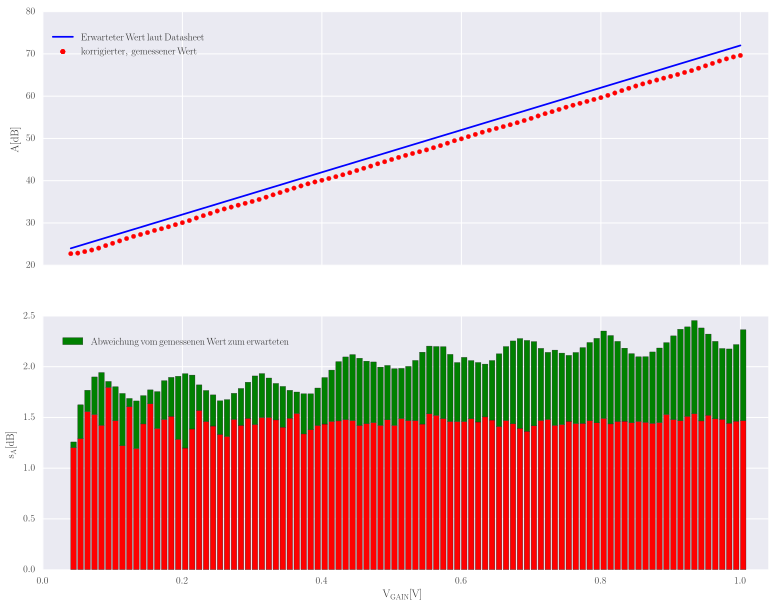

In [160]:
# VGA + LNA Transmission Measurement -50dB -10dB 200P OK 70kHz steps, properly terminated AD8331
import scipy as sp

R1 = 237
R2 = 28
R3 = 250
RL = 50
RS = 250

R1 = 1 / 2 * (RS + math.sqrt(RS * (RS - 2 * RL)))
print('R1:', R1, '=>', math.ceil(R1))

R2 = RL * R1 / (R1 - RL)
print('R2:', R2, '=>', math.ceil(R2))

R2pRL = (R2 * RL) / (R2 + RL)
a = R2pRL / (R1 + R2pRL)
print('alpha:', a)

print('=' * 10)
colors = cm.rainbow(np.linspace(0, 1, 10))
means = []
should = []
x = []
n = 0
f, axarr = plt.subplots(2, sharex=True)
f.set_size_inches(13, 10)
axarr[0].set_xlim((0, 1.04))
for i in range(4, 101):
    i /= 100
    x.append(i)
    should.append(50 * i - 6.5 + 28.5)
    subprocess.call(['sed', '-i.bak', 's/+-/-/g', '../measurements/vga_lna_2016-01-18_50dBm_10dB_HI_rez/reading_transmission_{:.2f}.csv'.format(i)])
    data = np.loadtxt('../measurements/vga_lna_2016-01-18_50dBm_10dB_HI_rez/reading_transmission_{:.2f}.csv'.format(i), dtype=np.complex, delimiter=',')
    data = list(map(lambda x: 20 * np.log10(np.abs(x / a * 2)) + 10, data))
    means.append(np.mean(data))
    if i * 100 % 10 == 0:
        print('=', end='')
print('\nDone.')
axarr[0].scatter(x, means, color='red', label='$\\mathrm{korrigierter,\\,gemessener\\,Wert}$')
axarr[0].plot(x, should, color='blue', label='$\\mathrm{Erwarteter\\,Wert\\,laut\\,Datasheet}$')

diff = np.subtract(means, should)
# axarr[1].bar(x, means, 0.008, color=colors[n % 10])
axarr[1].bar(x, -(diff - diff_ad8331), 0.008, color='red')
axarr[1].bar(x, -diff_ad8331, 0.008, bottom=-(diff - diff_ad8331), color='green', label='$\\mathrm{Abweichung\\,vom\\,gemessenen\\,Wert\\,zum\\,erwarteten}$')

axarr[0].set_ylabel('$\mathrm{A [dB]}$')
axarr[1].set_ylabel('$\mathrm{s_A [dB]}$')
axarr[1].set_xlabel('$\mathrm{V_{GAIN} [V]}$')
axarr[0].legend(bbox_to_anchor=(0.25, 0.95))
axarr[1].legend(bbox_to_anchor=(0.375, 0.95))

#plt.legend()
f.show()
f.savefig(save_loc + 'vga_lna_2016-01-18_50dBm_10dB_HI_rez_mean.pdf')

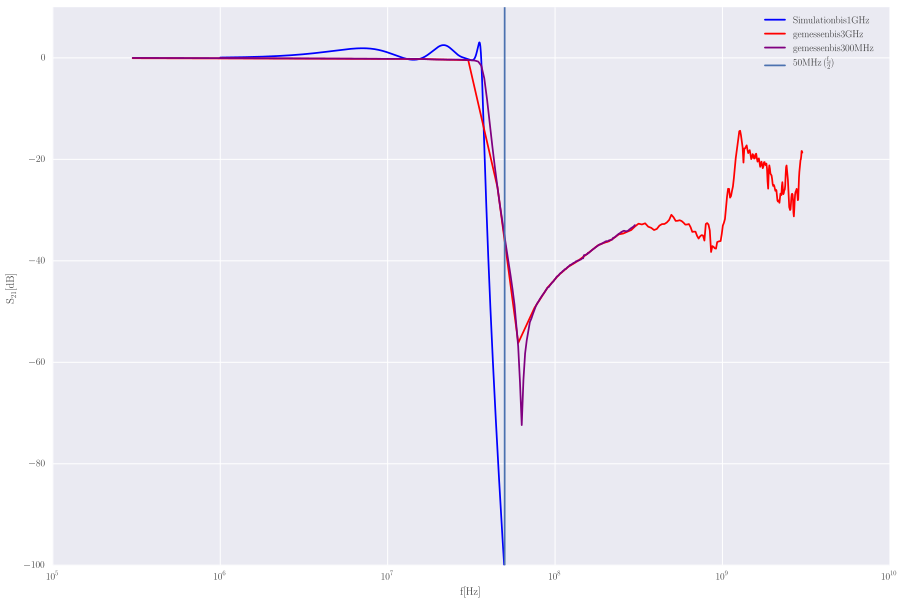

In [218]:
# Filter plots

plt.figure(figsize=(15, 10))

f = []
A = []

for line in open('../hardware/documentation/simulation/lowpass/result.txt'):
    s = line.split(',')
    f.append(float(s[0]))
    A.append(10**(float(s[1]) / 20) * np.exp(1j * float(s[2])))
plt.semilogx(f, 20*np.log(np.abs(A)), color='blue', label='$\mathrm{Simulation bis 1GHz}$')

f = []
A = []
    
for line in open('../measurements/lowpass_2016_12_02/LOWPASS300K-3G-CONNECTED.CSV'):
    s = line.split(', ')
    f.append(float(s[0]))
    A.append(float(s[1]))    
plt.semilogx(f, A, color='red', label='$\mathrm{gemessen bis 3GHz}$')

f = []
A = []


for line in open('../measurements/lowpass_2016_12_02/LOWPASS300K-300M-CONNECTED.CSV'):
    s = line.split(', ')
    f.append(float(s[0]))
    A.append(float(s[1]))    
plt.semilogx(f, A, color='purple', label='$\mathrm{gemessen bis 300MHz}$')

plt.axvline(5e7, label='$\mathrm{50MHz\,(\\frac{f_s}{2})}$')

plt.xlabel('$\mathrm{f [Hz]}$')
plt.ylabel('$\mathrm{S_{21} [dB]}$')
plt.ylim((-100.0, 10.0))
plt.legend()

plt.show()